# **1D Diffusion Approximated via SciPy Integration**

**6/21** 
<br>
For this, I utilized SciPy's integrate library. Specifically, I used the solve_ivp function and the RK45 method of integration, which is a built in parameter for the function. 
<br>
The RK45 method is an adaptive Runge-Kutta method accurate to the 4th-5th order and a good mix of speed and accuracy. There are a few other methods which could be of use to us, though. 
<br>
The most accurate is DOP853, an adaptive RK method which is even more accurate than RK45, but also computationally very expensive, good for benchmarking. 
<br>
Another potentially useful method is the LSODA method, which is made for unknown systems and automatically switches between stiff and non-stiff methods, it's accuracy can range, though, from 1st-12th order, so it has a special use case. 
<br>
Radau (implicit RK) and BDF (backward Euler) are made for stiffer systems, apparently "stable for tricky PDEs."

$$\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}$$

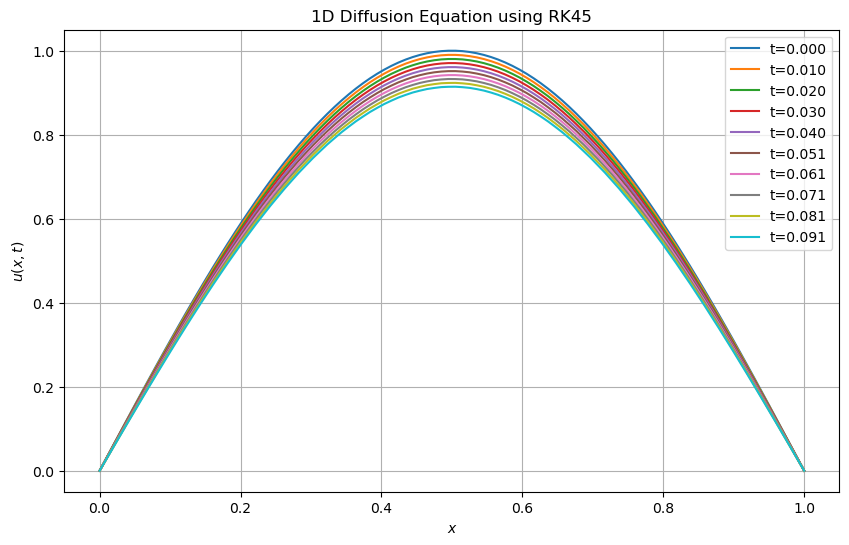

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp
import pandas as pd

# Domain parameters
L = 1.0                             # Length of the domain
N = 100                             # Number of spatial points
dx = L / (N - 1)                    # Spatial step size
x = np.linspace(0, L, N)            # Spatial grid

# Diffusion coefficient
D = 0.1

# Initial condition
u0 = np.sin(np.pi * x)              # Initial temperature distribution
u0[0] = 0                           # Boundary condition at x=0
u0[-1] = 0                          # Boundary condition at x=L

# Time domain
T = 0.1                             # Total time
t_span = (0, T)                     # Time span for the solver
t_eval = np.linspace(0, T, 100)     # Time points to evaluate the solution

# Right-hand side function for solve_ivp
def diffusion_rhs(t, u):
    dudt = np.zeros_like(u)
    dudt[1:-1] = D * (u[2:] - 2*u[1:-1] + u[:-2]) / dx**2
    return dudt

# Solve the system
sol = solve_ivp(diffusion_rhs, t_span, u0, method='RK45', t_eval=t_eval)

# Plot the solution at selected times
plt.figure(figsize=(10, 6))
for i in range(0, 100, 10):
    plt.plot(x, sol.y[:, i], label=f't={sol.t[i]:.3f}')
plt.xlabel('$x$')
plt.ylabel('$u(x, t)$')
plt.title('1D Diffusion Equation using RK45')
plt.legend()
plt.grid(True)
plt.show()

#### **Using Matplotlib's Animation Function**

For time-evolving PDEs, this is an important way to illustrate the evolution of the PDE. Although it cannot be shown on a poster, it could be shown as a .gif on a monitor or on a slidedeck during presentation. I'm using VS Code to build the code, and it cannot render the animation inside of the notebook, but it can cleanly be exported into a .gif or .mp4.

MovieWriter ffmpeg unavailable; using Pillow instead.


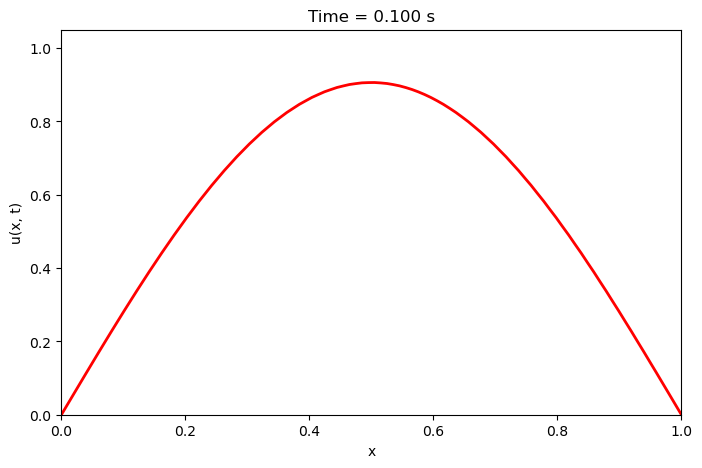

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot([], [], lw=2, color='red')
ax.set_xlim(0, L)
ax.set_ylim(0, 1.05)
ax.set_xlabel('x')
ax.set_ylabel('u(x, t)')
title = ax.set_title('')

def init():
    line.set_data([], [])
    title.set_text("")
    return line, title

def update(frame):
    u = sol.y[:, frame]
    t = sol.t[frame]
    line.set_data(x, u)
    title.set_text(f"Time = {t:.3f} s")
    return line, title

anim = FuncAnimation(fig, update, frames=len(sol.t), init_func=init, blit=True, interval=33)

# Save the animation as a GIF + MP4 for reference
# Note: Ensure you have ffmpeg installed for saving as MP4
#anim.save("1D_diffusion.mp4", fps=30, writer='ffmpeg')
anim.save("1D_diffusion.gif", fps=30)

#### **Save data to dataframe**

In [17]:
# Create an array to hold all x values — for each x, repeat for every time step
all_x = np.repeat(x, len(sol.t))

# Create an array to hold all time values — tile the full time array for each x
all_t = np.tile(sol.t, len(x))

# Flatten the solution array in a way that aligns with the new (x-dominant) ordering
all_u = sol.y.flatten()  # sol.y shape is (len(x), len(t)), already x-dominant

# Create the DataFrame
df = pd.DataFrame({
    'x': all_x,
    't': all_t,
    'u': all_u
})

# Save to .csv
df.to_csv("scipy_rk4.csv", index=False)

df.head()

,x,t,u
0,0.0,0.00000,0.0
1,0.0,0.00101,0.0
2,0.0,0.00202,0.0
3,0.0,0.00303,0.0
4,0.0,0.00404,0.0
